### Assignment P3 Notebook. 
This notebook corresponds to group 14's P3 contribution by Payton Ketterman


In [1]:
import pandas as pd # Dataframes
import sklearn as sk # Models
import seaborn as sb # Complex plots and plot features
import matplotlib.pyplot as plt # Simple plots, augments seaborn for labels and display
import numpy as np # Maths and calculations

# Ticker module from matplotlib for customizing and formatting axis ticks on plots as necessary
import matplotlib.ticker as ticker
# Imports the Linear Regression model for predicting continuous variables
from sklearn.linear_model import LinearRegression
# Provides functionality to generate combinations of elements from an iterable
from itertools import combinations
# Imports the function to compute R-squared metric for evaluating regression model's performance
from sklearn.metrics import r2_score

**Question 3:** In this assignment we use the **'Utrecht housing dataset'**. It can be found at kaggle here: https://www.kaggle.com/datasets/ictinstitute/utrecht-housing-dataset. Please read the description and download the utrechthousinglarge.csv file. We will only use this file. In the cell below, load the file and display the first 10 rows. (Hint. Use a pandas cheat sheet and check common functions such as describe, head and size. Check online docs if needed https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.size.html)

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/P-Kay/Downloads/IDS P3/recruitmentdataset-2022-1.3.csv')

# Recoding boolean to binary for specific columns
cols_to_recode = ['ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 
                  'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study']

df[cols_to_recode] = df[cols_to_recode].astype(int)

# Creating a mapping from degree type to ordinal value
degree_mapping = {'bachelor': 1, 'master': 2, 'phd': 3}

# Apply the mapping to the ind-degree column
df['ind-degree'] = df['ind-degree'].map(degree_mapping)

# Encoding for the gender column
gender_mapping = {'other': 2, 'male': 1, 'female': 0}
df['gender'] = df['gender'].map(gender_mapping)

# Filtering: Keeping rows where 'sport' is 'football', 'tennis', or 'golf' AND 'company' is 'B'
filtered_df = df[(df['sport'].isin(['Football', 'Tennis', 'Golf'])) & (df['company'] == 'B')]

# Display the first 10 rows of the DataFrame
print("First 10 rows:")
print(filtered_df.head(10))

# Display summary statistics
print("\nSummary statistics:")
print(filtered_df.describe())

# Display value counts of each column
print("\nValue Counts:")
print(filtered_df.value_counts())

# Get the size of the DataFrame (rows, columns)
print("\nSize of the dataframe:")
print(f"Number of rows: {filtered_df.shape[0]}")
print(f"Number of columns: {filtered_df.shape[1]}")

# Check for NaN values
print("\nChecking for NaN values:")
print(filtered_df.isna().sum())

# Check for null values
print("\nChecking for Null values:")
print(filtered_df.isnull().sum())

# Save the filtered DataFrame to a new CSV file, change filepath as necessary, haven't bothered setting workspace folder 
# for this one.
filtered_df.to_csv('C:/Users/P-Kay/Downloads/IDS P3/filtered_sports_and_company_data.csv', index=False)

First 10 rows:
          Id  gender  age nationality     sport  ind-university_grade  \
1007  x5572d       1   26       Dutch  Football                    66   
1010  x3158e       1   27     Belgian  Football                    55   
1011  x9413d       0   26       Dutch  Football                    66   
1012  x9400d       1   23       Dutch    Tennis                    67   
1015  x5254f       0   26       Dutch      Golf                    70   
1016  x7432e       1   24       Dutch  Football                    62   
1017  x3386e       1   32       Dutch      Golf                    60   
1021  x4103d       0   28     Belgian  Football                    66   
1022  x8601c       0   21       Dutch    Tennis                    71   
1024  x1131d       0   26     Belgian    Tennis                    69   

      ind-debateclub  ind-programming_exp  ind-international_exp  \
1007               0                    0                      0   
1010               1                    0    

**Barplots for Hiring Percentage by Age and Gender**<br>
Some are test plots, we can go through these and change or omit as needed.

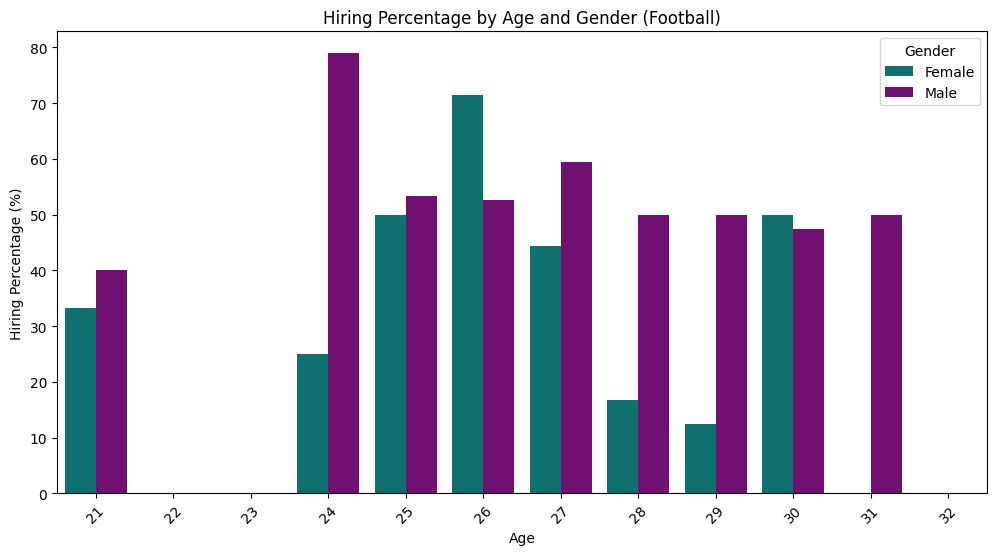

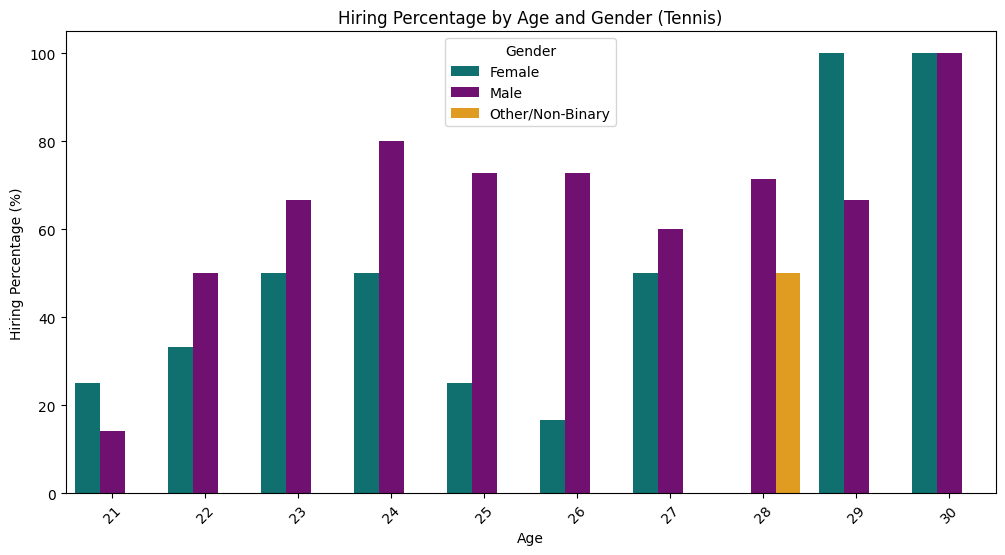

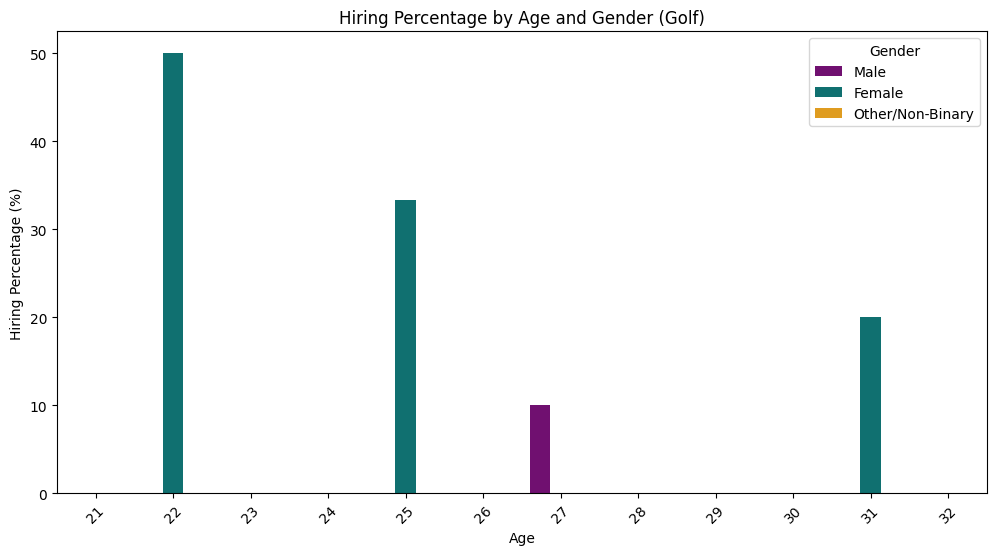

In [3]:

# Calculating hire percentage for each age, gender, and sport
grouped = filtered_df.groupby(['age', 'gender', 'sport'])
hire_percentage = grouped['decision'].mean() * 100  # Assuming 'decision' is a boolean indicating hiring

# Reset index for better visualization
hire_percentage = hire_percentage.reset_index()

# Replacing gender encoding with labels for clearer visualization
gender_labels = {0: 'Female', 1: 'Male', 2: 'Other/Non-Binary'}
hire_percentage['gender'] = hire_percentage['gender'].replace(gender_labels)

# Custom color palette
palette = {'Female': 'teal', 'Male': 'purple', 'Other/Non-Binary': 'orange'}

# Looping through each sport to create a separate plot
for sport in hire_percentage['sport'].unique():
    # Filtering data for the specific sport
    sport_data = hire_percentage[hire_percentage['sport'] == sport]
    
    # Visualization with seaborn
    plt.figure(figsize=(12, 6))
    sb.barplot(x='age', y='decision', hue='gender', data=sport_data, palette=palette)
    
    plt.title(f'Hiring Percentage by Age and Gender ({sport})')
    plt.ylabel('Hiring Percentage (%)')
    plt.xlabel('Age')
    plt.xticks(rotation=45)  # Rotate age labels for better readability
    plt.legend(title='Gender')
    plt.show()


**Hiring Percentage by Age and Nationality, and Age and University Grade Bar Plots**<br>
Creating separation between types of plots for clarity/feature separation.


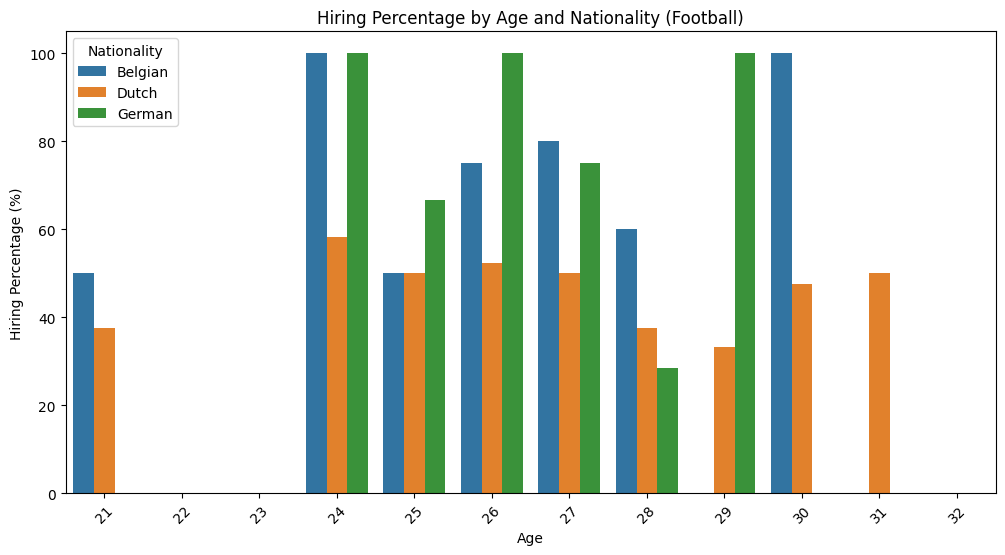

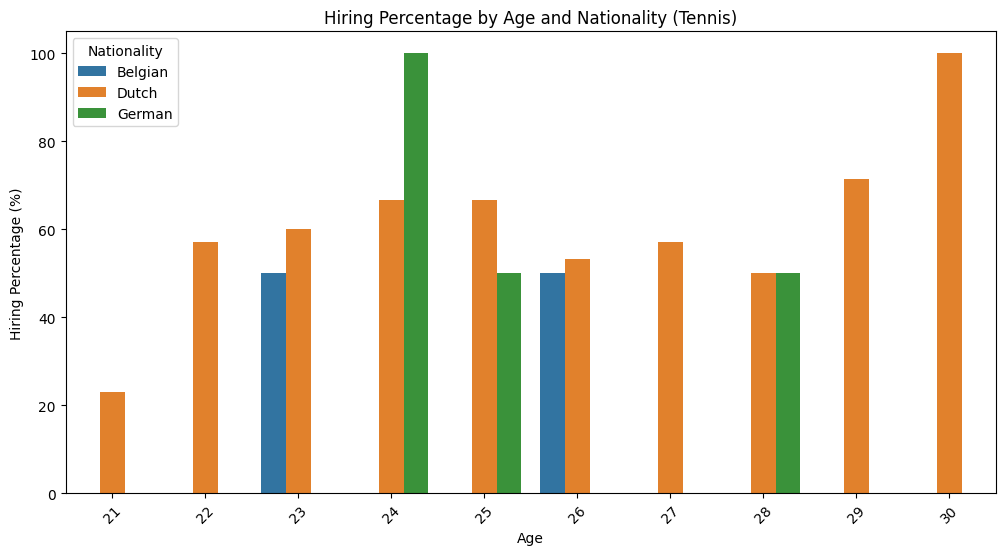

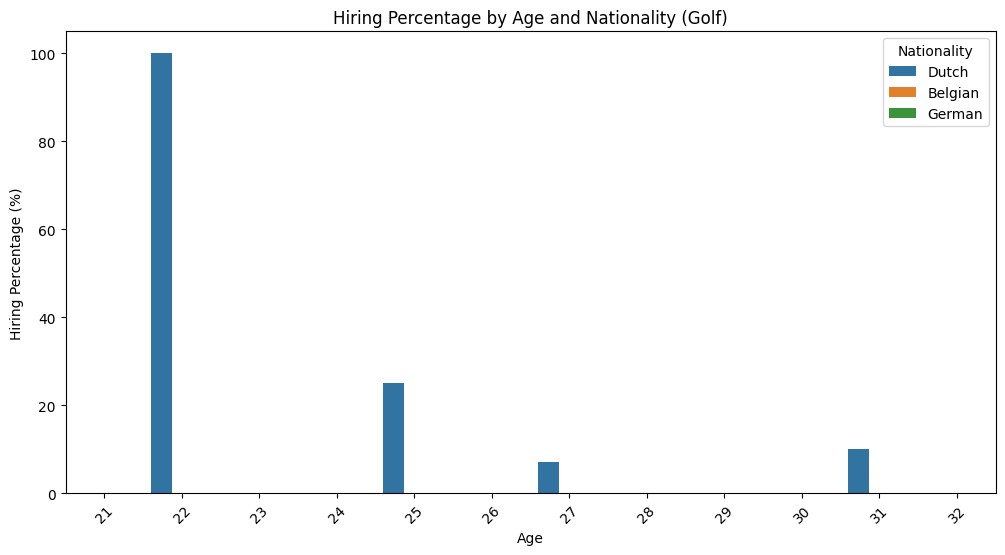

In [4]:
# Calculating hire percentage for each age, nationality, and sport
grouped = filtered_df.groupby(['age', 'nationality', 'sport'])
hire_percentage = grouped['decision'].mean() * 100  # Assuming 'decision' is a boolean indicating hiring

# Reset index for better visualization
hire_percentage = hire_percentage.reset_index()

# Looping through each sport to create a separate plot
for sport in hire_percentage['sport'].unique():
    # Filtering data for the specific sport
    sport_data = hire_percentage[hire_percentage['sport'] == sport]
    
    # Visualization with seaborn
    plt.figure(figsize=(12, 6))
    sb.barplot(x='age', y='decision', hue='nationality', data=sport_data)
    
    plt.title(f'Hiring Percentage by Age and Nationality ({sport})')
    plt.ylabel('Hiring Percentage (%)')
    plt.xlabel('Age')
    plt.xticks(rotation=45)  # Rotate age labels for better readability
    plt.legend(title='Nationality')
    plt.show()

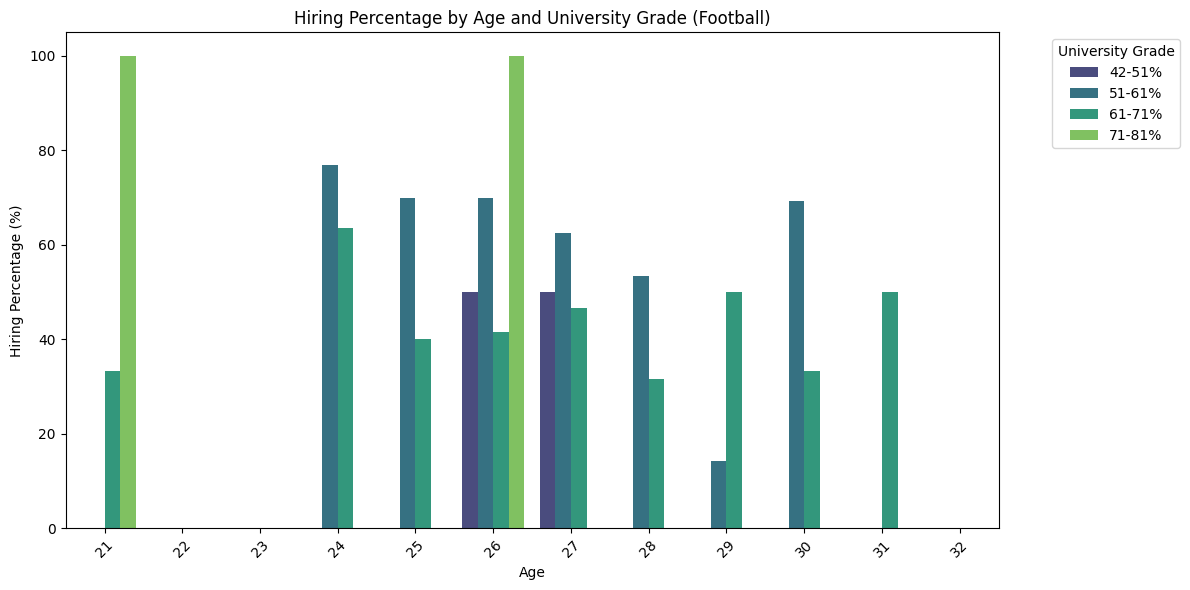

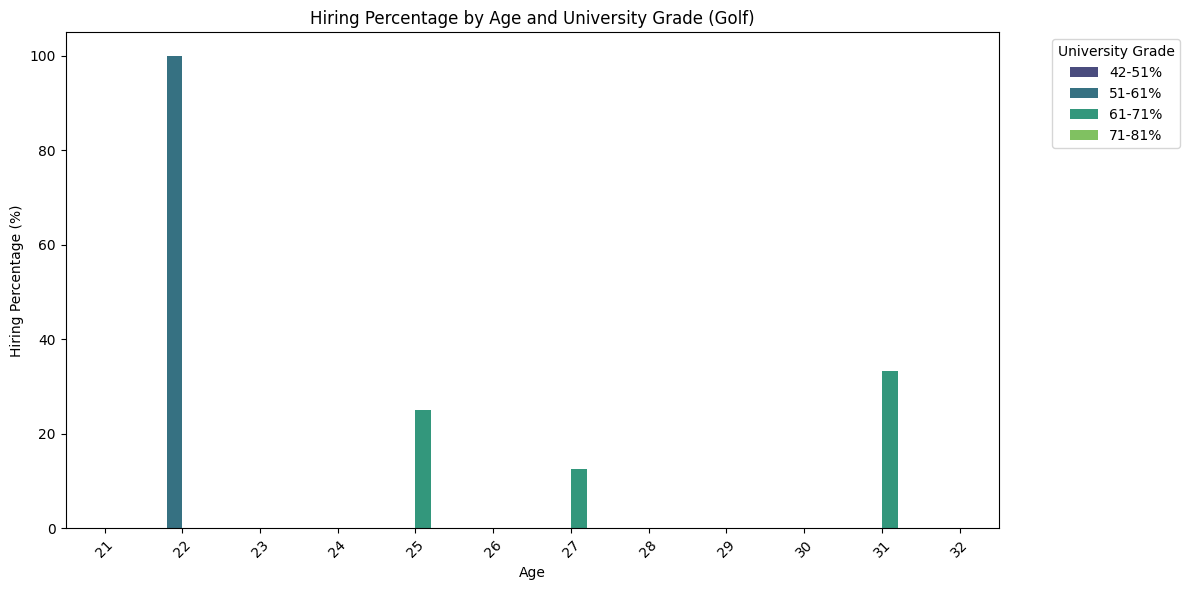

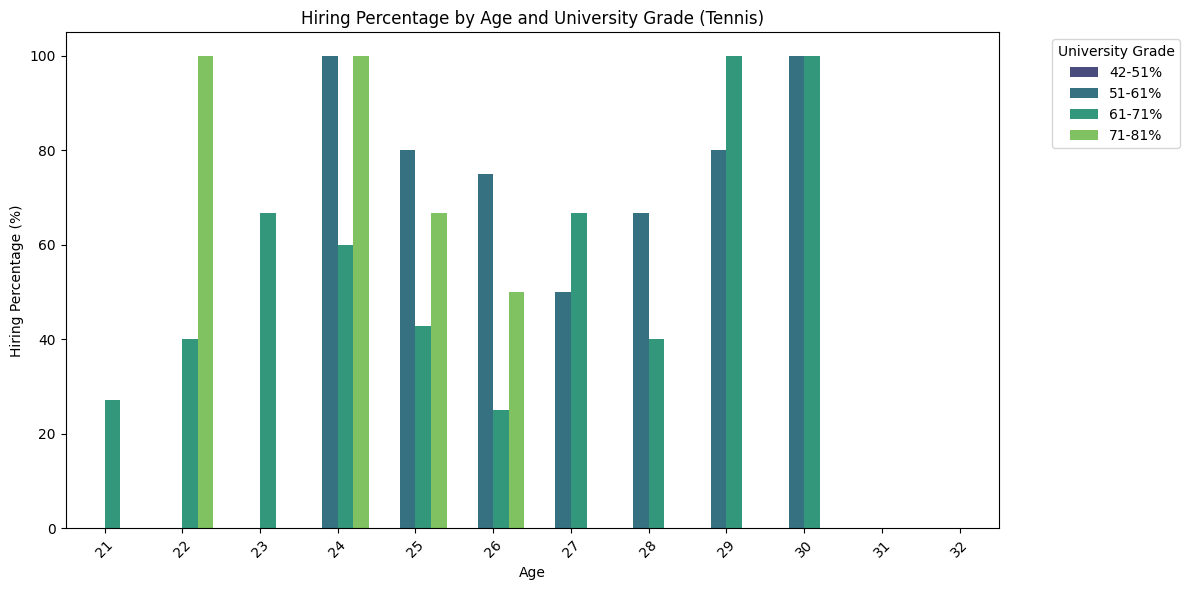

In [5]:
# Creating copy of filtered_df to avoid confusing pandas dataframe associations due to modifications
filtered_df = filtered_df.copy()

# Get min and max values for 'ind-university_grade'
min_grade = filtered_df['ind-university_grade'].min()
max_grade = filtered_df['ind-university_grade'].max()

# Set a buffer, 5% below min and above max
buffer = 5  # in percentage
min_bin = max(0, min_grade - buffer)  # ensure not below 0
max_bin = min(100, max_grade + buffer)  # ensure not above 100

# Create bins using np.linspace, which gives evenly spaced values over specified interval.
# Use this to set bin numbers, more or less as needed
num_bins = 5

bins = np.linspace(min_bin, max_bin, num_bins)
labels = [f"{int(bins[i])}-{int(bins[i+1])}%" for i in range(len(bins)-1)]

filtered_df['grade_bin'] = pd.cut(filtered_df['ind-university_grade'], bins=bins, labels=labels, include_lowest=True)

# Calculating hiring percentage
grouped = filtered_df.groupby(['age', 'grade_bin', 'sport'])
hire_percentage = grouped['decision'].mean() * 100  

# Reset index for better visualization
hire_percentage = hire_percentage.reset_index()

# Looping through each sport to create a separate plot
for sport in hire_percentage['sport'].unique():
    # Filtering data for the specific sport
    sport_data = hire_percentage[hire_percentage['sport'] == sport]
    
    # Visualization with seaborn
    plt.figure(figsize=(12, 6))
    sb.barplot(x='age', y='decision', hue='grade_bin', data=sport_data, palette="viridis")
    
    plt.title(f'Hiring Percentage by Age and University Grade ({sport})')
    plt.ylabel('Hiring Percentage (%)')
    plt.xlabel('Age')
    plt.xticks(rotation=45)  # Making x-axis labels readable
    plt.legend(title='University Grade', bbox_to_anchor=(1.05, 1), loc='upper left')  # Moving legend outside of plot, else too clustered
    plt.tight_layout()  # Adjusting layout to prevent clipping
    plt.show()


**Hiring Percentage by Age and Gender Barplot**<br>
Simple two-type comparison.


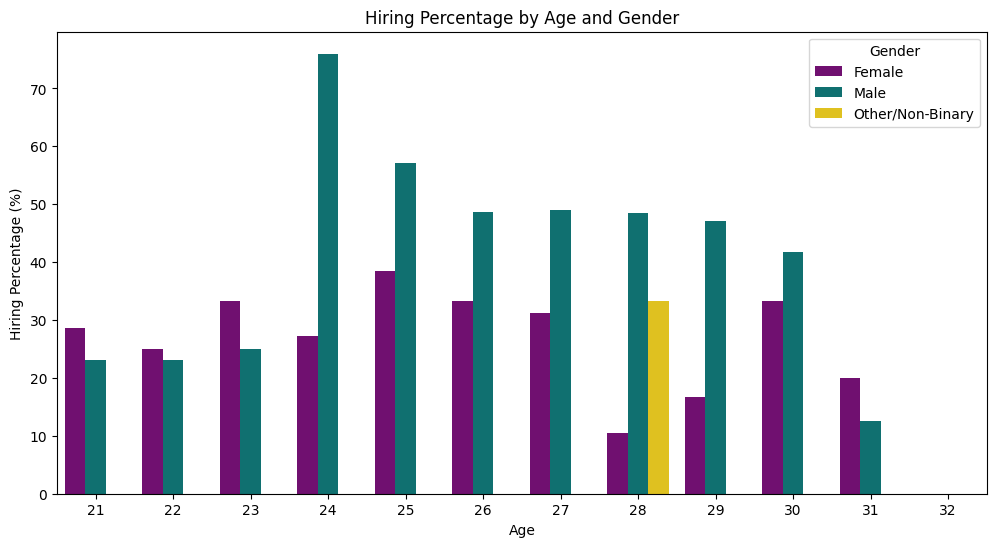

In [6]:
# Calculating hiring percentage for each age and gender
grouped = filtered_df.groupby(['age', 'gender'])
hire_percentage = grouped['decision'].mean() * 100  

# Reset index for better visualization
hire_percentage = hire_percentage.reset_index()

# Replacing gender encoding with labels for clearer visualization
gender_labels = {0: 'Female', 1: 'Male', 2: 'Other/Non-Binary'}
hire_percentage['gender'] = hire_percentage['gender'].replace(gender_labels)

# Visualization with seaborn
plt.figure(figsize=(12, 6))
sb.barplot(x='age', y='decision', hue='gender', data=hire_percentage, palette=['purple', 'teal', 'gold'])

plt.title('Hiring Percentage by Age and Gender')
plt.ylabel('Hiring Percentage (%)')
plt.xlabel('Age')
plt.legend(title='Gender')
plt.show()

**Hiring Percentage by Nationality, Gender, and Sport Subplots**<br>
Creating a set of subplots allows us to compare side-by-side with each sport what the hiring percentages are by nationality and gender.

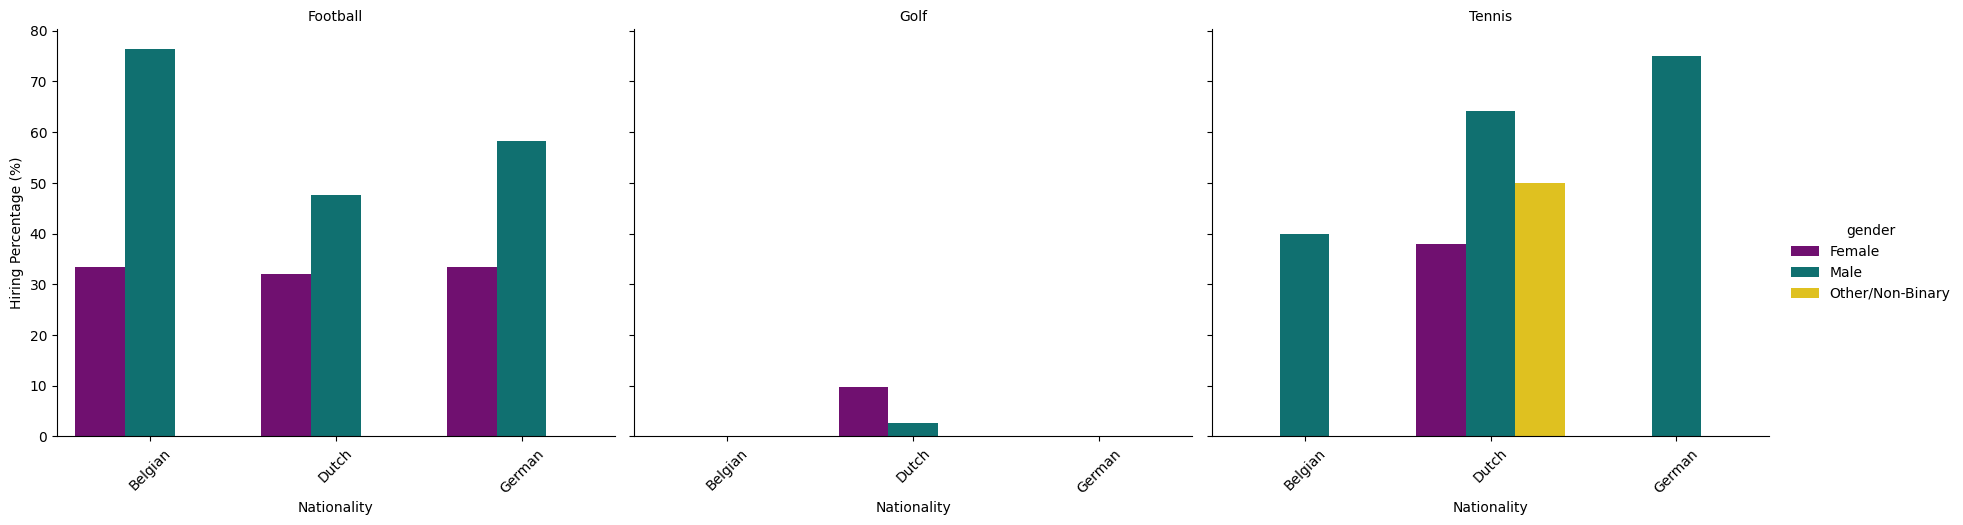

In [7]:
# Calculating hiring percentage for each sport, nationality, and gender
grouped = filtered_df.groupby(['sport', 'nationality', 'gender'])
hire_percentage = grouped['decision'].mean() * 100  

# Reset index for better visualization
hire_percentage = hire_percentage.reset_index()

# Replacing gender encoding with labels for clearer visualization
gender_labels = {0: 'Female', 1: 'Male', 2: 'Other/Non-Binary'}
hire_percentage['gender'] = hire_percentage['gender'].replace(gender_labels)

# Creating a grid of subplots, where each subplot will be a bar plot for one sport
g = sb.catplot(x='nationality', y='decision', hue='gender', col='sport',
               data=hire_percentage, kind='bar', palette=['purple', 'teal', 'gold'],
               height=5, aspect=1.2)

# Setting labels and titles
g.set_axis_labels('Nationality', 'Hiring Percentage (%)')
g.set_titles('{col_name}')

# Looping through each subplot in the FacetGrid and rotate x-tick labels
for ax in g.axes.flat:  # g.axes is a 2D array of Axes, flatten to get single list of values 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Showing the plot
plt.show()

**Correlation Matrix of coded and filtered dataframe**
This matrix is to check if there is some linear relation between any of our columns, to see if there's anything worth exploring further. We see that there are three columns, ind-debateclub, ind-entrepreneur_exp, and ind-languages that seem to have higher correlation than expected for hiring decision, so we will explore these further in the next plots.

C:\Users\P-Kay\AppData\Local\Temp\ipykernel_39448\814309043.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_encoded.corr()


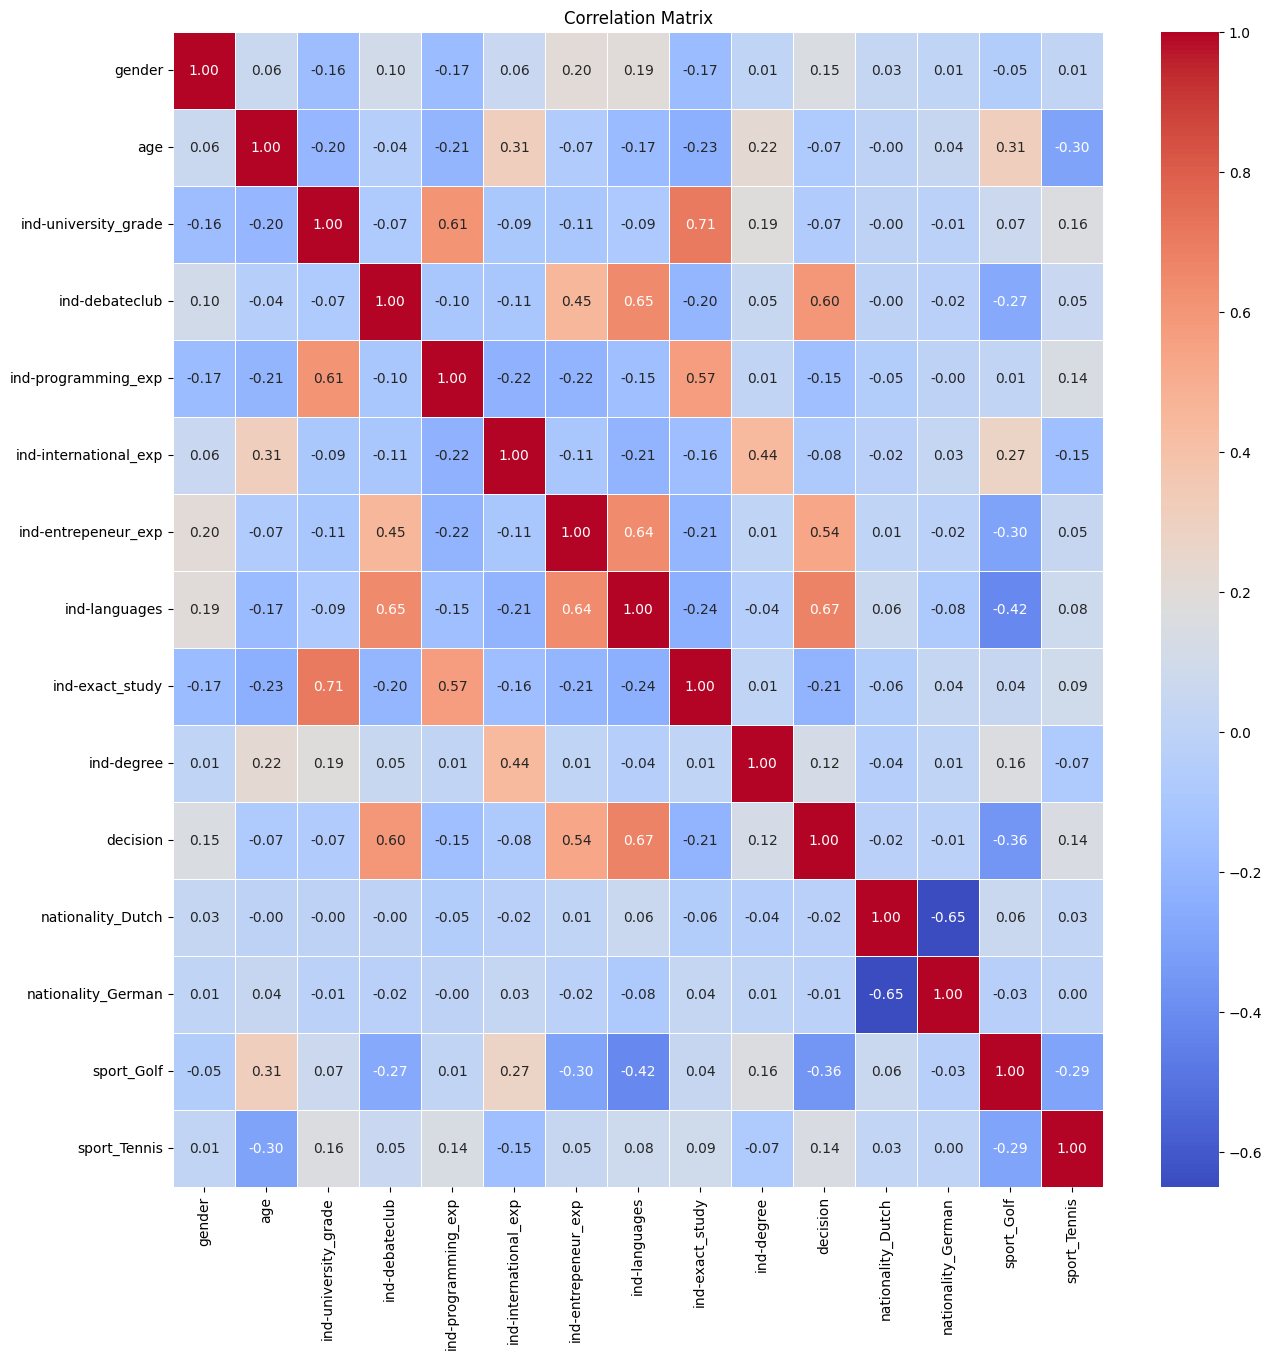

In [8]:
filtered_df = filtered_df.copy()
filtered_df['decision'] = filtered_df['decision'].astype(int)
# Example of One Hot Encoding for 'nationality' and 'sport'
# This will add new columns for each category with 1s and 0s
df_encoded = pd.get_dummies(filtered_df, columns=['nationality', 'sport'], drop_first=True)

# Dropping 'Id' as it’s likely not relevant for correlation
df_encoded = df_encoded.drop(columns=['Id'])

# Calculating the correlation matrix
corr_matrix = df_encoded.corr()

# Creating a heatmap
plt.figure(figsize=(15, 15))
sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Plots for Hiring Percentage on Highly Correlated columns**


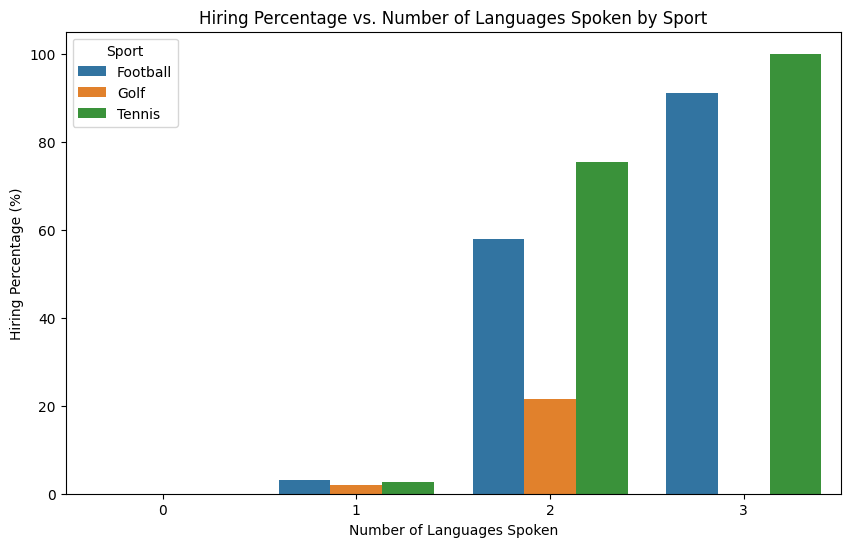

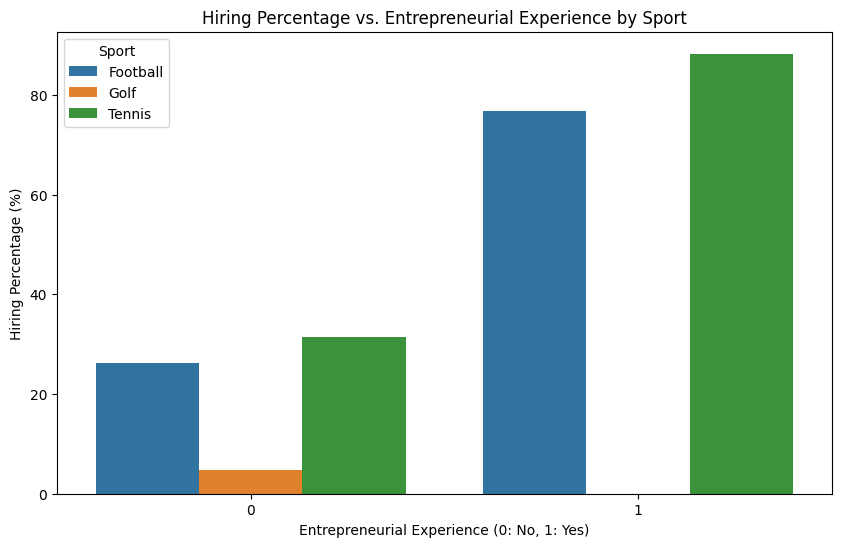

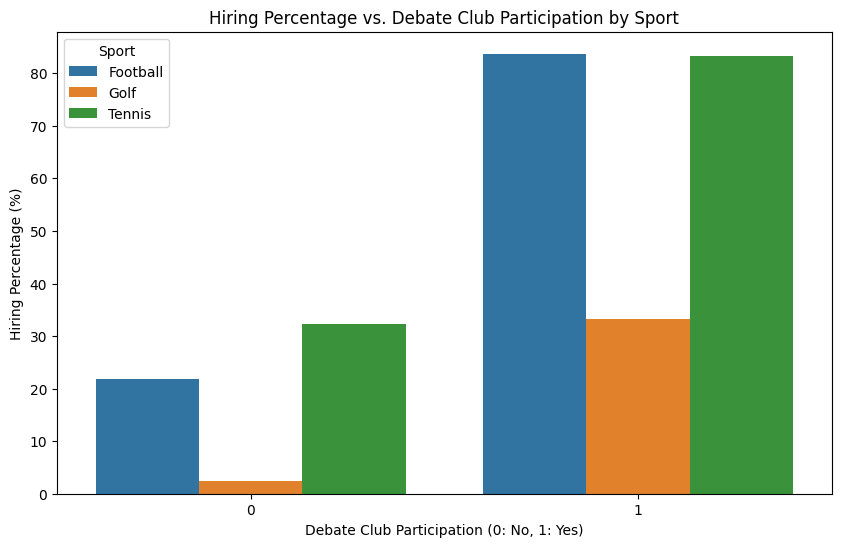

In [9]:
filtered_df = filtered_df.copy() # We make a new filtered_df to make sure the dataframe is clean

# Calculate hiring percentage based on sport and languages spoken
grouped_languages = filtered_df.groupby(['sport', 'ind-languages'])['decision'].mean().reset_index()
grouped_languages['decision'] = grouped_languages['decision'] * 100  # Convert to percentage

# Visualize the bar charts
plt.figure(figsize=(10, 6))
sb.barplot(data=grouped_languages, x='ind-languages', y='decision', hue='sport')
plt.title('Hiring Percentage vs. Number of Languages Spoken by Sport')
plt.ylabel('Hiring Percentage (%)')
plt.xlabel('Number of Languages Spoken')
plt.legend(title='Sport')
plt.show()

# Repeat similar steps for 'ind-entrepeneur_exp' and 'ind-debateclub'
grouped_entrepreneur = filtered_df.groupby(['sport', 'ind-entrepeneur_exp'])['decision'].mean().reset_index()
grouped_entrepreneur['decision'] = grouped_entrepreneur['decision'] * 100  # Convert to percentage

plt.figure(figsize=(10, 6))
sb.barplot(data=grouped_entrepreneur, x='ind-entrepeneur_exp', y='decision', hue='sport')
plt.title('Hiring Percentage vs. Entrepreneurial Experience by Sport')
plt.ylabel('Hiring Percentage (%)')
plt.xlabel('Entrepreneurial Experience (0: No, 1: Yes)')
plt.legend(title='Sport')
plt.show()

grouped_debateclub = filtered_df.groupby(['sport', 'ind-debateclub'])['decision'].mean().reset_index()
grouped_debateclub['decision'] = grouped_debateclub['decision'] * 100  # Convert to percentage

plt.figure(figsize=(10, 6))
sb.barplot(data=grouped_debateclub, x='ind-debateclub', y='decision', hue='sport')
plt.title('Hiring Percentage vs. Debate Club Participation by Sport')
plt.ylabel('Hiring Percentage (%)')
plt.xlabel('Debate Club Participation (0: No, 1: Yes)')
plt.legend(title='Sport')
plt.show()
